In [1]:
%matplotlib inline

Analyze seqFISH data
====================

This tutorial shows how to apply Squidpy for the analysis of seqFISH data.

The data used here was obtained from {cite}`lohoff2020highly`.
We provide a pre-processed subset of the data, in {class}`anndata.AnnData` format.
For details on how it was pre-processed, please refer to the original paper.

Import packages & data
----------------------
To run the notebook locally, create a conda environment as *conda env create -f environment.yml* using this
`environment.yml <https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml>`_.

In [2]:
import numpy as np

import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.23.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10
squidpy==1.3.1


/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


First, let's visualize cluster annotation in spatial context
with {func}`squidpy.pl.spatial_scatter`.

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future 

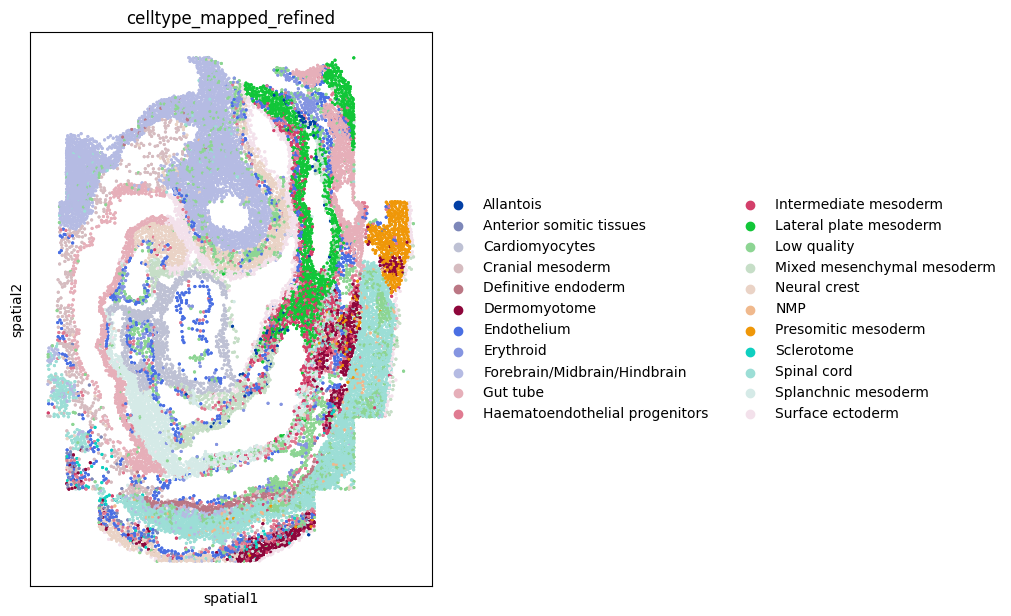

In [3]:
sq.pl.spatial_scatter(
    adata, color="celltype_mapped_refined", shape=None, figsize=(10, 10)
)

Neighborhood enrichment analysis
--------------------------------
Similar to other spatial data, we can investigate spatial organization of clusters
in a quantitative way, by computing a neighborhood enrichment score.
You can compute such score with the following function: {func}`squidpy.gr.nhood_enrichment`.
In short, it's an enrichment score on spatial proximity of clusters:
if spots belonging to two different clusters are often close to each other,
then they will have a high score and can be defined as being *enriched*.
On the other hand, if they are far apart, the score will be low
and they can be defined as *depleted*.
This score is based on a permutation-based test, and you can set
the number of permutations with the `n_perms` argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute that as well.
This can be done with {func}`squidpy.gr.spatial_neighbors`.
Please see {doc}`../examples/graph/compute_spatial_neighbors` for more details
of how this function works.

Finally, we'll directly visualize the results with {func}`squidpy.pl.nhood_enrichment`.
We'll add a dendrogram to the heatmap computed with linkage method *ward*.

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
100%|██████████| 1000/1000 [00:05<00:00, 172.24/s]
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_play

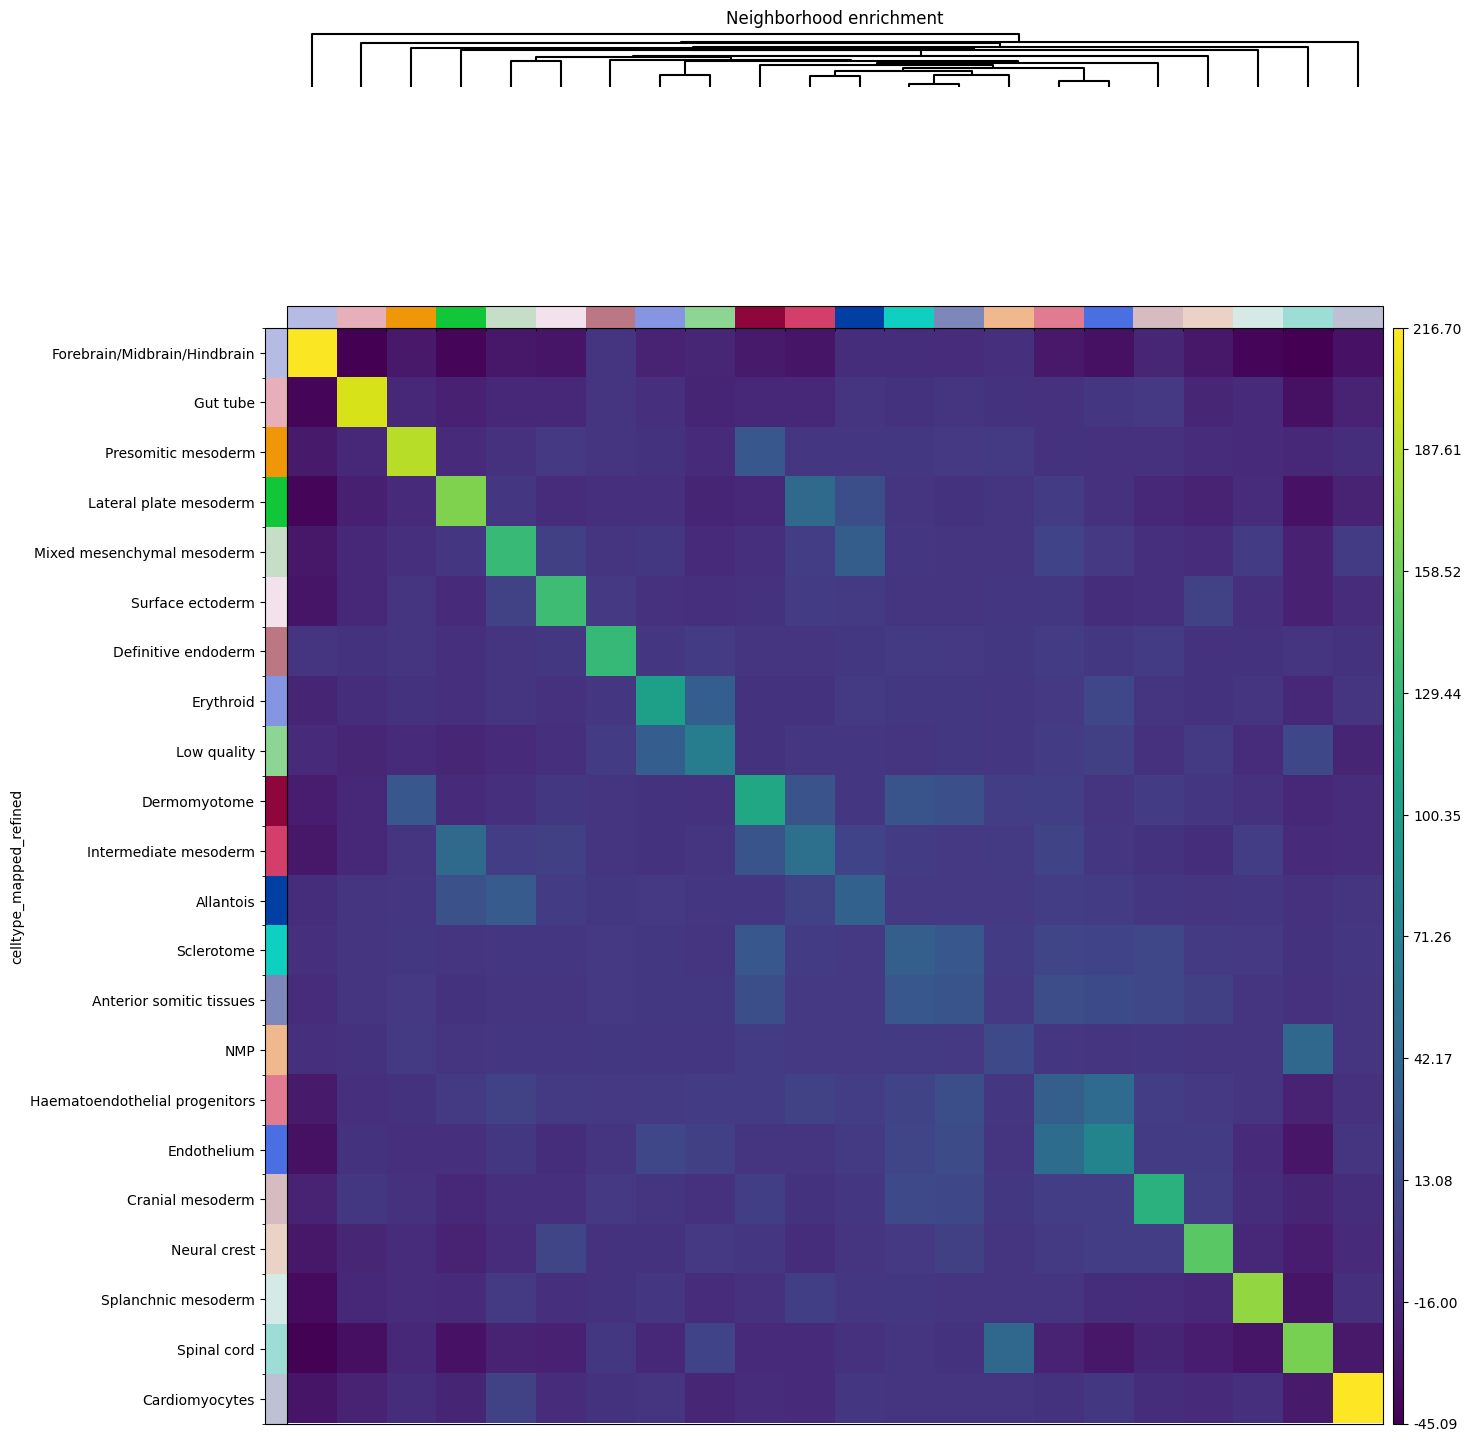

In [4]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

A similar analysis was performed in the original publication {cite}`lohoff2020highly`,
and we can appreciate to what extent results overlap.
For instance, there seems to be an enrichment between the *Lateral plate mesoderm*,
the *Intermediate mesoderm* and a milder enrichment for *Allantois* cells.
As in the original publication, there also seems to be an association between the *Endothelium* and
the *Haematoendothelial progenitors*.
Of course, results do not perfectly overlap, and this could be due to several factors:

  - the construction of the neighbors graph (which in our case is
    not informed by the radius, as we did not have access to this information).
  - the number of permutation of the neighborhood enrichment
    (500 in the original publication against the default 1000 in our implementation).

We can also visualize the spatial organization of cells again,
and appreciate the proximity of specific cell clusters.
For this, we'll use {func}`squidpy.pl.spatial_scatter` again.

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:388: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if key not in adata.obs or not is_categorical_dtype(adata.obs[key]):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

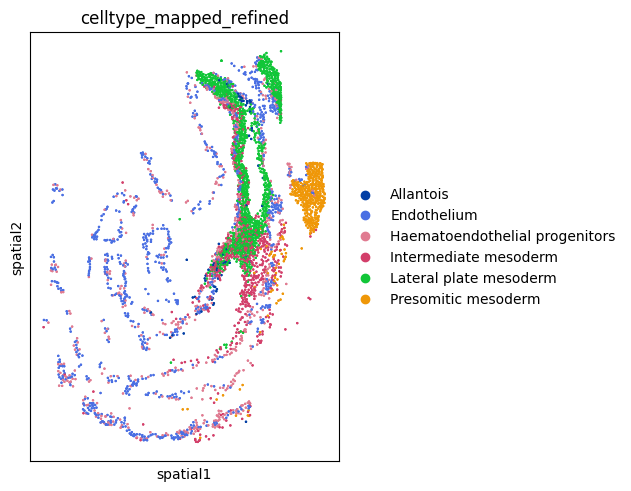

In [5]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    shape=None,
    size=2,
)

Co-occurrence across spatial dimensions
---------------------------------------
In addition to the neighbor enrichment score, we can visualize cluster co-occurrence
in spatial dimensions.
This is a similar analysis of the one presented above,
yet it does not operate on the connectivity matrix,
but on the original spatial coordinates.
The co-occurrence score is defined as:

.. math::

    \frac{p(exp|cond)}{p(exp)}

where {math}`p(exp|cond)` is the conditional probability of observing a
cluster {math}`exp` conditioned on the presence of a cluster {math}`cond`, whereas
{math}`p(exp)` is the probability of observing {math}`exp` in the radius size
of interest. The score is computed across increasing radii size
around each cell in the tissue.

We can compute this score with {func}`squidpy.gr.co_occurrence`
and set the cluster annotation for the conditional probability with
the argument ``clusters``. Then, we visualize the results with
{func}`squidpy.pl.co_occurrence`.

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
100%|██████████| 1/1 [00:32<00:00, 32.01s/]
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


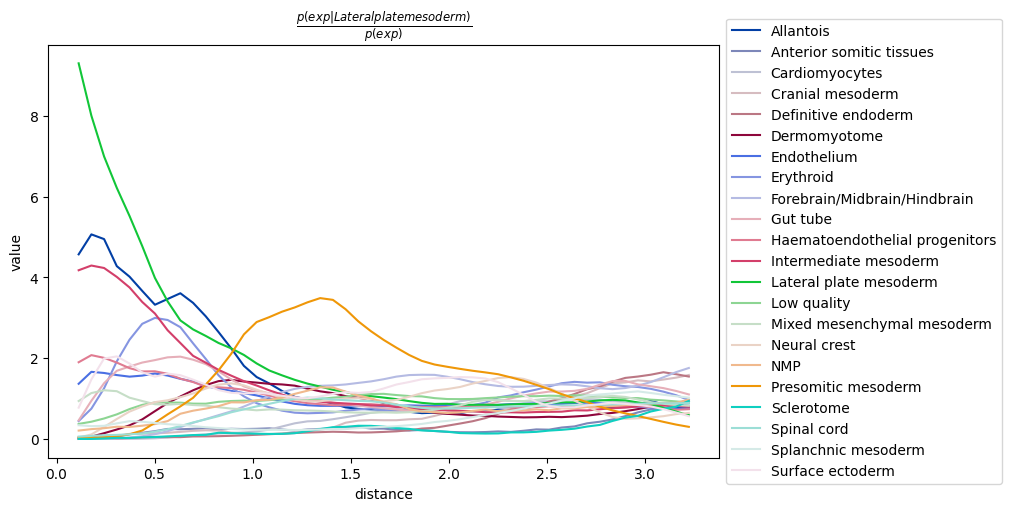

In [6]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
)

It seems to recapitulate a previous observation, that there is a co-occurrence between the
conditional cell type annotation *Lateral plate mesoderm* and the clusters
*Intermediate mesoderm* and *Allantois*.
It also seems that at longer distances, there is a co-occurrence of cells belonging to
the *Presomitic mesoderm* cluster. By visualizing the full tissue as before we can indeed
appreciate that these cell types seems to form a defined clusters relatively close
to the *Lateral plate mesoderm* cells.
It should be noted that the distance units corresponds to
the spatial coordinates saved in `adata.obsm['spatial']`.

Ligand-receptor interaction analysis
------------------------------------
The analysis showed above has provided us with quantitative information on
cellular organization and communication at the tissue level.
We might be interested in getting a list of potential candidates that might be driving
such cellular communication.
This naturally translates in doing a ligand-receptor interaction analysis.
In Squidpy, we provide a fast re-implementation the popular method CellPhoneDB {cite}`cellphonedb`
(`code <https://github.com/Teichlab/cellphonedb>`_)
and extended its database of annotated ligand-receptor interaction pairs with
the popular database *Omnipath* {cite}`omnipath`.
You can run the analysis for all clusters pairs, and all genes (in seconds,
without leaving this notebook), with {func}`squidpy.gr.ligrec`.

Let's perform the analysis and visualize the result for three clusters of
interest: *Lateral plate mesoderm*,
*Intermediate mesoderm* and *Allantois*. For the visualization, we will
filter out annotations
with low-expressed genes (with the ``means_range`` argument)
and decreasing the threshold for the adjusted p-value (with the ``alpha`` argument).

In [7]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)
sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
    source_groups="Lateral plate mesoderm",
    target_groups=["Intermediate mesoderm", "Allantois"],
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/gr/_ligrec.py:732: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data.groupby("clusters")
100%|██████████| 100/100 [00:05<00:00, 18.39permutation/s]


ValueError: After removing rows with only NaN interactions, none remain.

The dotplot visualization provides an interesting set of candidate interactions
that could be involved in the tissue organization of the cell types of interest.
It should be noted that this method is a pure re-implementation of the original
permutation-based test, and therefore retains all its caveats
and should be interpreted accordingly.

# AnnData to Graph and investigate its properties

In [8]:
dir(adata)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories',
 '_sanitize',
 '_s

In [9]:
sq.gr.spatial_neighbors(adata)

In [10]:
adata.obsp["spatial_connectivities"]

<19416x19416 sparse matrix of type '<class 'numpy.float64'>'
	with 116496 stored elements in Compressed Sparse Row format>

/Users/shayanhajhashemi/.julia/dev/spatial_transcriptomics_playground/space_trans/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


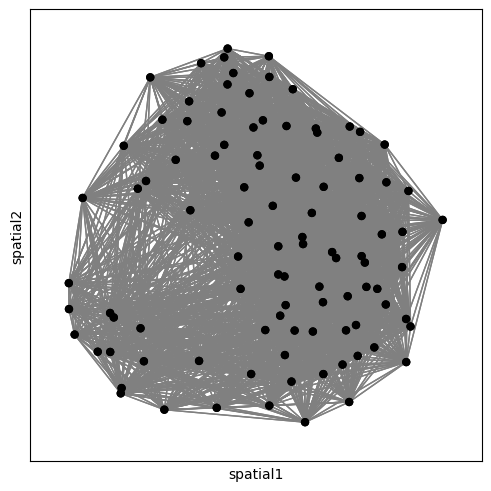

In [15]:
sq.gr.spatial_neighbors(adata, n_neighs=100, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    connectivity_key="spatial_connectivities",
    size=100,
)

In [22]:
arr = adata.obsp["spatial_distances"][420, :].toarray()

In [28]:
print(max(arr[0]))

0.20378262369308706


In [29]:
adj = adata.obsp["spatial_connectivities"][0].toarray()

In [36]:
heatmap(adj)

NameError: name 'heatmap' is not defined

In [37]:
adata.X

<19416x351 sparse matrix of type '<class 'numpy.float32'>'
	with 1890790 stored elements in Compressed Sparse Column format>